In [8]:
import pandas as pd
import re
import string


file_path = 'GrammarandProductReviews.csv'
data = pd.read_csv(file_path)


stopwords = set([
    'a', 'an', 'the', 'and', 'or', 'but', 'if', 'while', 'of', 'at', 'by', 
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once'
])


def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    
    # Quitar las URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Quitar caracteres especiales como # o @
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Quitar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    return text


data['reviews.text'] = data['reviews.text'].astype(str).apply(preprocess_text)


data.to_csv('Reviews_Preprocessed.csv', index=False)

data.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more hip hop s...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read reviews here looking buying one couples...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel us gel caused irrit...,Irritation,NaN,NaN,Walker557,67981934427


Para la limpieza del dataset se procedió a : 


Conversión de texto a minúsculas: Se transformó todo el texto de las reseñas a minúsculas para uniformar el formato y evitar problemas de sensibilidad a mayúsculas/minúsculas.

Eliminación de URLs: Se eliminaron los enlaces web presentes en las reseñas utilizando expresiones regulares, ya que estos no aportan valor semántico al análisis.

Eliminación de caracteres especiales como # y @: Se quitaron estos caracteres que comúnmente se usan en redes sociales, ya que no añaden información relevante en este contexto.

Eliminación de signos de puntuación: Se removieron los signos de puntuación del texto, ya que no contribuyen al análisis de las palabras.

Eliminación de stopwords: Se eliminaron las palabras vacías como artículos, preposiciones y conjunciones.

# Análisis exploratorio


La palabra que más se repite es "great" con 20946 apariciones.


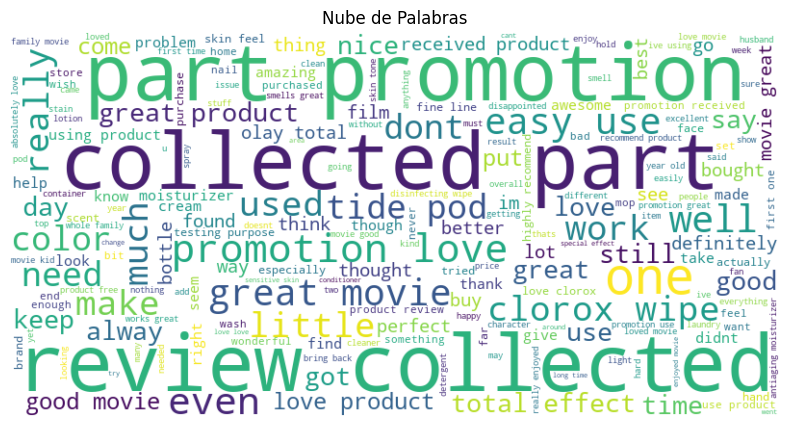

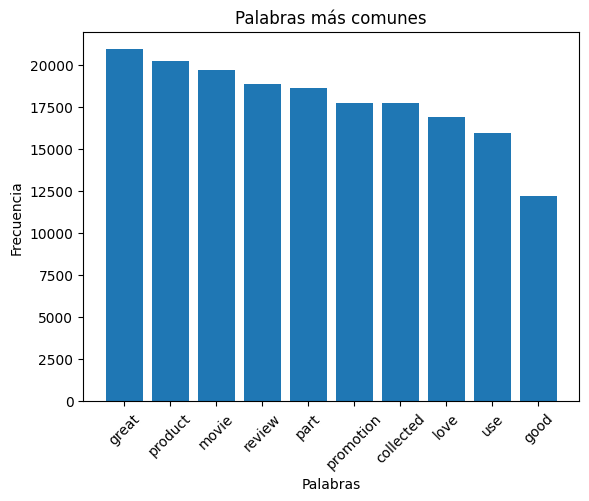

Palabras presentes en todas las reseñas: 
Palabras positivas: 60450
Palabras negativas: 3556


In [15]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Cargar el dataset
file_path = 'GrammarandProductReviews.csv'
data = pd.read_csv(file_path)

# Convertir a minúsculas y eliminar puntuación
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    return text

# Aplicar la limpieza a la columna de texto
data['cleaned_text'] = data['reviews.text'].astype(str).apply(clean_text)

# Quitar stopwords en inglés
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 1. Palabra que se repite más
all_words = ' '.join(data['cleaned_text']).split()
word_counts = Counter(all_words)
most_common_word, freq = word_counts.most_common(1)[0]
print(f'La palabra que más se repite es "{most_common_word}" con {freq} apariciones.')

# 2. Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

# 3. Histograma de las palabras más comunes
common_words = word_counts.most_common(10)  # Las 10 palabras más comunes
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.title('Palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# 4. Determinar las palabras presentes en todas las reseñas
words_in_all = set.intersection(*[set(text.split()) for text in data['cleaned_text'] if isinstance(text, str)])
print(f"Palabras presentes en todas las reseñas: {', '.join(words_in_all)}")

# 5. Clasificar palabras positivas y negativas
positive_words = set(['good', 'great', 'excellent', 'love', 'best', 'amazing', 'awesome'])  # Añadir más según el contexto
negative_words = set(['bad', 'terrible', 'worst', 'disappointed', 'poor', 'horrible'])

positive_count = sum(word in positive_words for word in all_words)
negative_count = sum(word in negative_words for word in all_words)

print(f"Palabras positivas: {positive_count}")
print(f"Palabras negativas: {negative_count}")


La mayoría de las reseñas tienen un tono positivo, lo cual se evidencia por la alta frecuencia de palabras como "great", "love", y "good".

Muchas de las reseñas parecen estar relacionadas con productos obtenidos a través de promociones, lo que se puede inferir de la frecuencia de las palabras "promotion" y "collected".

A pesar de algunas reseñas negativas, estas son significativamente menores en comparación con las positivas, lo que sugiere una percepción general favorable de los productos.

# Teniendo en cuenta la cantidad de palabras positivas y negativas de la reseña determine qué tan positivo, negativo o neutral es el mismo para el producto

In [4]:
import pandas as pd
import re
from collections import Counter

# Lista de palabras positivas y negativas (puede ser expandida)
positive_words = set(['good', 'great', 'excellent', 'love', 'best', 'amazing', 'awesome', 'wonderful'])
negative_words = set(['bad', 'terrible', 'worst', 'disappointed', 'poor', 'horrible', 'awful', 'hate'])

# Función para limpiar el texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    return text

# Función para clasificar el sentimiento
def classify_sentiment(text):
    words = text.split()
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    
    # Clasificación basada en la diferencia
    if positive_count > negative_count:
        return 'Positiva'
    elif negative_count > positive_count:
        return 'Negativa'
    else:
        return 'Neutral'


# Limpiar el texto
data['cleaned_text'] = data['reviews.text'].astype(str).apply(clean_text)

# Aplicar la clasificación de sentimiento a cada reseña
data['sentiment'] = data['cleaned_text'].apply(classify_sentiment)

# Mostrar un resumen de los resultados
print(data['sentiment'].value_counts())

# Guardar los resultados en un nuevo archivo CSV
data.to_csv('Reviews_with_Sentiment.csv', index=False)

# Mostrar algunas filas con la clasificación de sentimiento
data[['reviews.text', 'sentiment']].head()


sentiment
Positiva    41429
Neutral     27661
Negativa     1954
Name: count, dtype: int64


,reviews.text,sentiment
0,i love this album its very good more hip hop s...,Positiva
1,good flavor this review was collected as part ...,Positiva
2,good flavor,Positiva
3,i read reviews here looking buying one couples...,Negativa
4,my husband bought this gel us gel caused irrit...,Neutral


Mayoría de reseñas positivas:

41,429 reseñas fueron clasificadas como Positivas, lo que representa la mayor parte del conjunto de datos. Esto demuestra que la mayoría de los usuarios están satisfechos con los productos que revisaron, indicando una percepción general favorable de los productos o servicios ofrecidos. Palabras como "great", "good", "love", y "excellent" aparecen con frecuencia en estas reseñas.

Cantidad significativa de reseñas neutrales:

27,661 reseñas fueron categorizadas como Neutrales, lo que también representa una proporción considerable del total. Estas reseñas probablemente contienen una mezcla equilibrada de términos positivos y negativos o carecen de palabras lo suficientemente cargadas emocionalmente como para clasificarlas claramente como positivas o negativas. Esto podría significar que los usuarios expresan opiniones mesuradas, haciendo notar tanto aspectos buenos como malos de los productos.

Baja proporción de reseñas negativas:

Solo 1,954 reseñas fueron clasificadas como Negativas, lo que indica una proporción muy pequeña de insatisfacción entre los usuarios. Esto indica que los productos generalmente cumplen con las expectativas de los consumidores y que los comentarios negativos son minoritarios.

Existe una percepción positiva predominante de los productos, con una cantidad considerable de reseñas neutrales. La baja cantidad de reseñas negativas sugiere que los productos en general son bien recibidos. 